<a href="https://colab.research.google.com/github/KovryakRuslan312005/CH_M_Kovryak/blob/main/%D0%9B%D0%91.%E2%84%965%20%D0%9A%D0%BE%D0%B2%D1%80%D1%8F%D0%BA%20%D0%A0%D1%83%D1%81%D0%BB%D0%B0%D0%BD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

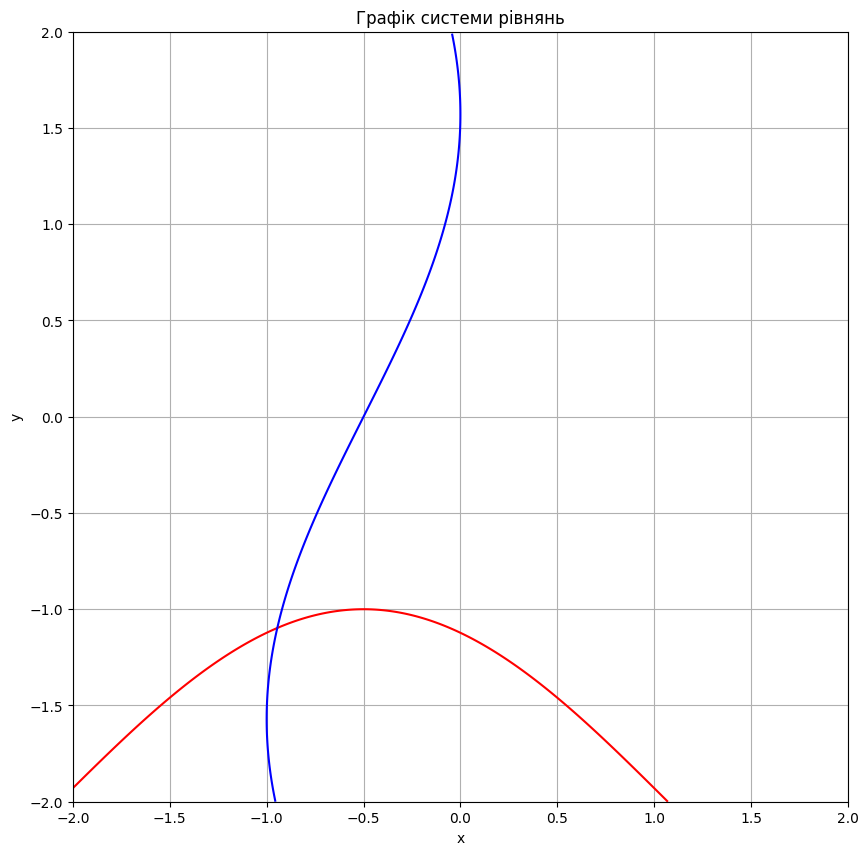

Simple iteration:
x= inf 
y= -1.4119048917328203e+308 
The amount of iteration =  2100
Check: [-0.94501116 -1.09739414]


<ipython-input-3-2812a2345bc2>:46: RuntimeWarning: overflow encountered in scalar multiply
  return np.sin(x) - 2*x - 1
<ipython-input-3-2812a2345bc2>:43: RuntimeWarning: invalid value encountered in cos
  return np.cos(y + 0.5) - y - 2
<ipython-input-3-2812a2345bc2>:54: RuntimeWarning: invalid value encountered in scalar subtract
  while ((abs(xn1 - xn) >= e) & (abs(yn1 - yn) >= e)):


In [ ]:
 import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize
import math

# Область значень для x та y
x_min, x_max = -2, 2
y_min, y_max = -2, 2
step = 0.01

# Створюємо масиви значень x та y
x, y = np.meshgrid(np.arange(x_min, x_max, step), np.arange(y_min, y_max, step))

# Рівняння системи
def eq1(x, y):
    return np.cos(x + 0.5) - y - 2

def eq2(x, y):
    return np.sin(y) - 2*x - 1

# Створюємо графік
fig, ax = plt.subplots(figsize=(10, 10))

# Додаємо графік першого рівняння
ax.contour(x, y, eq1(x, y), levels=[0], colors='red')

# Додаємо графік другого рівняння
ax.contour(x, y, eq2(x, y), levels=[0], colors='blue')

# Налаштування графіка
ax.set_xlim([x_min, x_max])
ax.set_ylim([y_min, y_max])
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('Графік системи рівнянь')
plt.grid(True)

# Показуємо графік
plt.show()

# Розв'язок системи рівнянь методом простої ітерації
def f1(y):
    return np.cos(y + 0.5) - y - 2

def f2(x):
    return np.sin(x) - 2*x - 1

def iter(x, y, e):
    xn = x
    yn = y
    xn1 = f2(x)
    yn1 = f1(y)
    n = 1
    while ((abs(xn1 - xn) >= e) & (abs(yn1 - yn) >= e)):
        xn = xn1
        yn = yn1
        xn1 = f2(yn)
        yn1 = f1(xn)
        n += 1
    print('Simple iteration:')
    print('x=', xn, '\ny=', yn, '\nThe amount of iteration = ', n)

x0 = 0.15
y0 = -2.1
delta = 0.1
iter(x0, y0, 0.0001)

# Перевірка розв'язку
def f3(x):
    return np.cos(x[0] + 0.5) - x[1] - 2, np.sin(x[1]) - 2*x[0] - 1

s = optimize.root(f3, [0., 0.], method='hybr')
print('Check:', s.x)
